In [18]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.datasets


%matplotlib inline

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
df.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [19]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [20]:
df.loc[:,'Daily Time Spent on Site'] = df.loc[:,'Daily Time Spent on Site'].apply(lambda x: (x-65)/15.85)

In [22]:
df.loc[:,'Age'] = df.loc[:,'Age'].apply(lambda x: (x-36)/8.785)
df.loc[:,'Area Income'] = df.loc[:,'Area Income'].apply(lambda x: (x-55000)/13415)
df.loc[:,'Daily Internet Usage'] = df.loc[:,'Daily Internet Usage'].apply(lambda x: (x-180)/44)

In [24]:
df.iloc[:,[0,1,2,3,6]].apply(lambda x:max(x))

Daily Time Spent on Site    1.667508
Age                         2.845760
Area Income                 1.825181
Daily Internet Usage        2.044545
Male                        1.000000
dtype: float64

In [140]:
df2 = df.drop(['Ad Topic Line','City','Country','Timestamp','Clicked on Ad'],axis=1)
Y = df['Clicked on Ad']
X = df2

In [110]:
from sklearn.model_selection import train_test_split

In [114]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.33,random_state=101)

In [116]:
X_train = np.array(X_train.T)
X_test  = np.array(X_test.T)

In [120]:
y_train = np.array(y_train)
y_train = y_train.reshape(1,-1)

y_test  = np.array(y_test)
y_test  = y_test.reshape(1,-1)

<table>
    <tr><td>
    <font color="skyblue" size="26">sigmoid function</font>
    </td></tr>    
</table> 

In [38]:
def sigmoid(Z):
    s = 1/(1+np.exp(-Z))
    return s

In [163]:
n = [X_train.shape[0],1]
L=len(n)-1
learning_rate=0.8
n_iteration = 10000

In [164]:
# W_b initialization
W,b = [[None],[None]] 
for i in range(1,L+1):
    w_i = np.random.randn(n[i],n[i-1])*np.sqrt(1/n[i-1])
    b_i = np.zeros((n[i],1))

    W.append(w_i)
    b.append(b_i)

# no of training examples
m = X_train.shape[-1]

costs = []
for iterations in range(n_iteration):
    # forward propogation
    A = [X_train]
    Z = [None]

    for i in range(1,L+1):
        z_i = np.dot(W[i],A[i-1])+b[i]

        if i==L:
            a_i = sigmoid(z_i)
        else:
            a_i = np.tanh(z_i)

        assert(a_i.shape == (n[i],m))
        assert(z_i.shape == (n[i],m))

        A.append(a_i)
        Z.append(z_i)

    # computing cost
    if iterations%1000 == 0:
        cost = (-1/m)*(np.dot(np.log(A[L]),y_train.T)+np.dot(np.log(1-A[L]),(1-y_train).T))
        cost = np.squeeze(cost)
        costs.append(cost)
        print(f"cost after the iteration {iterations}:{cost}")
    # backward propagation
    dZ,dW,db = [[None],[None],[None]]

    for j in range(0,L):
        i = L-j
        # print(f"i:{i} and j:{j}")
        if i==L:
            dZ_i = A[i]-y_train
        else:
            dZ_i = np.dot(W[i+1].T,dZ[j])*(1-np.power(A[i],2))

        assert(dZ_i.shape == (n[i],m))
        dZ.append(dZ_i)

        dW_i = (1/m)*np.dot(dZ[j+1],A[i-1].T)
        db_i = (1/m)*np.sum(dZ[j+1],axis=1,keepdims=True)   


        assert(dW_i.shape == (n[i],n[i-1]))
        assert(db_i.shape == (n[i],1))


        dW.append(dW_i)
        db.append(db_i)

    dZ = dZ[:1]+dZ[1:][::-1]
    dW = dW[:1]+dW[1:][::-1]
    db = db[:1]+db[1:][::-1]
    for i in range(1,L+1):
        W[i] = W[i]-learning_rate*dW[i]
        b[i] = b[i]-learning_rate*db[i]

        assert(W[i].shape == (n[i],n[i-1]))
        assert(b[i].shape == (n[i],1))  

cost after the iteration 0:0.88993219815546
cost after the iteration 1000:0.10754547923024448
cost after the iteration 2000:0.10753127788332643
cost after the iteration 3000:0.10753123023459253
cost after the iteration 4000:0.10753123006825509
cost after the iteration 5000:0.10753123006767308
cost after the iteration 6000:0.10753123006767103
cost after the iteration 7000:0.10753123006767103
cost after the iteration 8000:0.10753123006767103
cost after the iteration 9000:0.10753123006767103


In [169]:
#prediction
def predict(X,W,b):
    A = [X]
    Z = [None]
    n = [X.shape[0],1]
    m = X.shape[-1] 
    L=len(n)-1
    
    for i in range(1,L+1):
        z_i = np.dot(W[i],A[i-1])+b[i]

        if i==L:
            a_i = sigmoid(z_i)
        else:
            a_i = np.tanh(z_i)

        assert(a_i.shape == (n[i],m))
        assert(z_i.shape == (n[i],m))

        A.append(a_i)
        Z.append(z_i)

    return(A[-1])

<table>
    <tr><td>
    <font color="purple" size="26">test set accuracy</font>
    </td></tr>    
</table>

In [170]:
predictions = predict(X_test,W,b)
predictions = predictions>0.5
print ('Accuracy: %d' % float((np.dot(y_test,predictions.T) + np.dot(1-y_test,1-predictions.T))/float(y_test.size)*100) + '%')

Accuracy: 97%


<table>
    <tr><td>
    <font color="purple" size="26">train set accuracy</font>
    </td></tr>    
</table> 

In [171]:
predictions = predict(X_train,W,b)
predictions = predictions>0.5
print ('Accuracy: %d' % float((np.dot(y_train,predictions.T) + np.dot(1-y_train,1-predictions.T))/float(y_train.size)*100) + '%')

Accuracy: 96%


In [135]:
class DeepNeuralNet():
    def __init__(self,X_train,y_train,neuron_per_layer_list,learning_rate=0.05,n_iteration=10000):
        self.X = X_train
        self.Y = y_train
        
        # parameters to be optimize
        self.W = None
        self.b = None
        
        # hyperparameters to be tuned
        self.l_list = neuron_per_layer_list
        
        self.n = [self.X.shape[0]]+neuron_per_layer_list
        self.L = len(self.n)-1
        
        self.learning_rate = learning_rate
        self.n_iteration   = n_iteration
        
        
        self.costs = []
        
        # no of training examples
        self.m = self.X.shape[-1]
        '''
        n = [X.shape[0],12,1]
        L=len(n)-1
        learning_rate=0.8
        n_iteration = 10000
        '''
        self.__w_b_Initializer__()
        self.__propgate__()
        
    def __w_b_Initializer__(self): 
        # W_b initialization
        self.W,self.b = [[None],[None]] 
        L,n = self.L,self.n
        
        for i in range(1,L+1):
            w_i = np.random.randn(n[i],n[i-1])*np.sqrt(1/n[i-1])
            b_i = np.zeros((n[i],1))

            self.W.append(w_i)
            self.b.append(b_i)    

    def __propgate__(self):
        costs = self.costs
        for iterations in range(self.n_iteration):
            # forward propogation
            L,m,X,Y,W,b,n = self.L,self.m,self.X,self.Y,self.W,self.b,self.n
            
            A = [X]
            Z = [None]
            
            for i in range(1,L+1):
                z_i = np.dot(W[i],A[i-1])+b[i]

                if i==L:
                    a_i = sigmoid(z_i)
                else:
                    a_i = np.tanh(z_i)

                assert(a_i.shape == (n[i],m))
                assert(z_i.shape == (n[i],m))

                A.append(a_i)
                Z.append(z_i)

            # computing cost
            if iterations%1000 == 0:
                cost = (-1/m)*(np.dot(np.log(A[L]),Y.T)+np.dot(np.log(1-A[L]),(1-Y).T))
                cost = np.squeeze(cost)
                costs.append(cost)
                print(f"cost after the iteration {iterations}:{cost}")
            # backward propagation
            dZ,dW,db = [[None],[None],[None]]

            for j in range(0,L):
                i = L-j
                # print(f"i:{i} and j:{j}")
                if i==L:
                    dZ_i = A[i]-Y
                else:
                    dZ_i = np.dot(W[i+1].T,dZ[j])*(1-np.power(A[i],2))

                assert(dZ_i.shape == (n[i],m))
                dZ.append(dZ_i)

                dW_i = (1/m)*np.dot(dZ[j+1],A[i-1].T)
                db_i = (1/m)*np.sum(dZ[j+1],axis=1,keepdims=True)   


                assert(dW_i.shape == (n[i],n[i-1]))
                assert(db_i.shape == (n[i],1))


                dW.append(dW_i)
                db.append(db_i)

            dZ = dZ[:1]+dZ[1:][::-1]
            dW = dW[:1]+dW[1:][::-1]
            db = db[:1]+db[1:][::-1]
            for i in range(1,L+1):
                W[i] = W[i]-learning_rate*dW[i]
                b[i] = b[i]-learning_rate*db[i]

                assert(W[i].shape == (n[i],n[i-1]))
                assert(b[i].shape == (n[i],1))  
                
        self.W = W
        self.b = b
        self.costs = costs
        
    def predict(self,X_test):
        X,W,b = X_test,self.W,self.b
        L,m,n = self.L,X_test.shape[-1],self.n
        
        A = [X]
        Z = [None]

        for i in range(1,L+1):
            z_i = np.dot(W[i],A[i-1])+b[i]

            if i==L:
                a_i = sigmoid(z_i)
            else:
                a_i = np.tanh(z_i)

            assert(a_i.shape == (n[i],m))
            assert(z_i.shape == (n[i],m))

            A.append(a_i)
            Z.append(z_i)
        
        predictions = A[-1]>0.5
        
        return(predictions)
    
    def accuracy(self,X_test,y_test):
        predictions = self.predict(X_test)
        Y = y_test
        print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')
        return float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)

In [139]:
nn_predictions = DeepNeuralNet(X_train,y_train,[5,4,1],0.5).w_b_Initializer().propgate().accuracy(X_test,y_test)

cost after the iteration 0:0.5922014346589359
cost after the iteration 1000:0.05958981444653562
cost after the iteration 2000:0.05147175384679532
cost after the iteration 3000:0.04702530496920368
cost after the iteration 4000:0.04410091008138935
cost after the iteration 5000:0.04240444918038752
cost after the iteration 6000:0.04099571171269536
cost after the iteration 7000:0.03932330331979524
cost after the iteration 8000:0.03782040063353634
cost after the iteration 9000:0.035830396852747796
Accuracy: 96%


<table>
    <tr>
        <td>hydraulic cylinder and valves can cost from 5 to 10 times more than similar size pneumatic elements</td>
    </tr>
    <tr><td>transmission line is pneumatic are made up of inexpensive flexible</td></tr>
    </table>

### compressed air generation and compressed air consumption
<ol>
    <li>compressor</li>
    <li>pressure switch</li>
    <li>check valve</li>
    <font color="green">
    <li>after filter</li>
    </font>

* air service unit
* speed controller
* electric motor
* safety valve
* pressure gauge
* tapping
* direction control valve
* air receiver
* auto drain
* air dryer
* auto drain
* actuator
</ol>

In [142]:
df_1 = pd.read_csv('train_ctrUa4K.csv')

In [143]:
df_1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [144]:
df_1.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

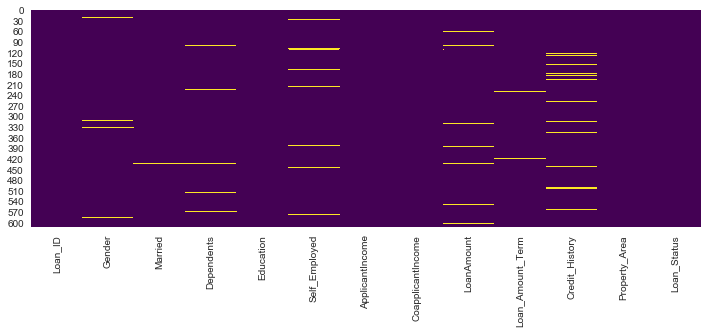

In [147]:
plt.figure(figsize=(12,4))
sns.heatmap(df_1.isna()==True,cbar=False,cmap='viridis')

In [148]:
df_2 = pd.read_csv('test_lAUu6dG.csv')

In [149]:
df_2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [150]:
df_2.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

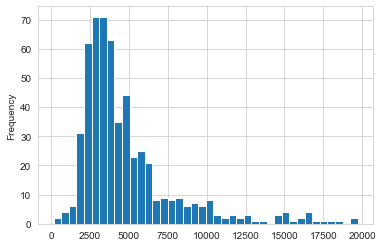

In [162]:
df_1.loc[(df_1['Credit_History'].isna()==False) & (df_1['ApplicantIncome']<=20000),'ApplicantIncome'].plot(kind='hist',bins=40)

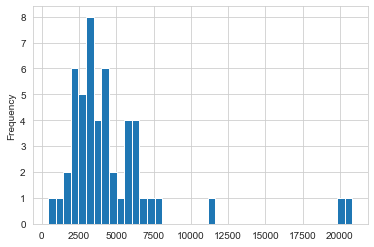

In [160]:
df_1.loc[df_1['Credit_History'].isna()==True,'ApplicantIncome'].plot(kind='hist',bins=40)